In [1]:
import nappy.nappy_api
import pandas as pd 
# import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import calendar

In [2]:
site_path = ['SPL_2011_2024_final.csv', 'table_mountain_2019_2024_aerosol_data.csv']
site_name = input('input site name')
site = None

if site_name == 'SPL':
    site = site_path[0]
    
else:
    site = site_path[1]
    
adjusted_csv_path = os.path.join(os.getcwd(), f'{site}')

def adjusted_coefficients(csv_file):
    
    date = []
    starttime = []
    scattering_coeff = []
    absorption_coeff = []
    absorption_angstrom = []
    scattering_angstrom = []
    ssa = []
    
    adjusted_csv = pd.read_csv(csv_file, header=0) 
    
    adjusted_csv.replace([99999.99, 9999.99, 999.999999, 999.99, 99.99, 9.999], np.NaN, inplace=True)    
    
    for selected_columns in adjusted_csv.columns:
        
        if selected_columns.startswith('pm1') or selected_columns.startswith('starttime') or selected_columns.startswith('Date'):

            if selected_columns.startswith('pm1'):
                
                variable = selected_columns.find('_') + 1
                
                selected_variable = selected_columns[variable: (variable + 10)]

                if selected_columns.startswith('pm1'):
                    
                    if selected_variable == 'scattering':

                        variable = selected_columns.find('angstrom')
                                    
                        if variable == -1:
                            
                            scattering_coeff.append(selected_columns)
                            
                        else:
                            scattering_angstrom.append(selected_columns)
                
                    elif selected_variable == 'absorption': 
                        
                        variable = selected_columns.find('angstrom')
                        
                        if variable == -1:
                            
                            absorption_coeff.append(selected_columns)
                            
                        else:
                            absorption_angstrom.append(selected_columns)
                        
                    else:
                        
                        if selected_variable.startswith('ssa'):
                            
                            ssa.append(selected_columns)
                        
            elif selected_columns.startswith('starttime'):

                starttime.append(selected_columns)
                
            else:
                
                date.append(selected_columns)
                        
    return starttime, absorption_coeff, absorption_angstrom, scattering_coeff, scattering_angstrom, date, adjusted_csv
    
adjusted_coefficients(adjusted_csv_path)

(['starttime'],
 ['pm1_absorption_coeff_450',
  'pm1_absorption_coeff_550',
  'pm1_absorption_coeff_700',
  'pm10_absorption_coeff_450',
  'pm10_absorption_coeff_550',
  'pm10_absorption_coeff_700'],
 ['pm1_absorption_angstrom_450_700', 'pm10_absorption_angstrom_450_700'],
 ['pm1_scattering_coeff_450',
  'pm1_scattering_coeff_550',
  'pm1_scattering_coeff_700',
  'pm10_scattering_coeff_450',
  'pm10_scattering_coeff_550',
  'pm10_scattering_coeff_700'],
 ['pm1_scattering_angstrom_450_700', 'pm10_scattering_angstrom_450_700'],
 ['Date'],
         starttime                 Date  pm1_absorption_coeff_450  \
 0         1.00000  2011-01-01 00:00:00                       NaN   
 1         1.04167  2011-01-01 01:00:00                       NaN   
 2         1.08333  2011-01-01 02:00:00                       NaN   
 3         1.12500  2011-01-01 03:00:00                       NaN   
 4         1.16667  2011-01-01 04:00:00                       NaN   
 ...           ...                  ...    

In [8]:
aerosol_variable = input('what variable are you looking for?')

def aerosol_plots(columns, variable):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
        'coefficients': {
            'scattering': columns[3], 
            'absorption': columns[1]
            },
        'starttime':columns[0]
    }
    
    for variable in new_dictionary['coefficients'][variable]:    
        variable_columns.append(variable)
        
    for time in new_dictionary['starttime']:
        variable_columns.append(time)
        
    return dataframe[variable_columns]
    
columns = adjusted_coefficients(adjusted_csv_path)
aerosol_plots(columns, aerosol_variable)


,pm1_scattering_coeff_450,pm1_scattering_coeff_550,pm1_scattering_coeff_700,pm10_scattering_coeff_450,pm10_scattering_coeff_550,pm10_scattering_coeff_700,starttime
0,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
1,NaN,NaN,NaN,NaN,NaN,NaN,1.04167
2,NaN,NaN,NaN,NaN,NaN,NaN,1.08333
3,NaN,NaN,NaN,NaN,NaN,NaN,1.12500
4,NaN,NaN,NaN,NaN,NaN,NaN,1.16667
...,...,...,...,...,...,...,...
122731,3.02,2.10,1.26,4.09,3.07,2.03,366.79167
122732,6.27,3.55,1.77,4.90,2.92,1.70,366.83333
122733,4.29,2.61,1.29,3.93,2.58,1.41,366.87500
122734,5.16,3.24,1.33,5.10,3.14,1.25,366.91667


In [9]:
def cleaned_csv(data_copy):
    dataframe = []
    
    for row in data_copy.values:

        if pd.isnull(row).any():
            continue
        
        else:
            dataframe.append(row)
            
    dataframe = pd.DataFrame(dataframe, columns=data_copy.columns)

    return dataframe     

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable) 
cleaned_csv(plots)  

,pm1_scattering_coeff_450,pm1_scattering_coeff_550,pm1_scattering_coeff_700,pm10_scattering_coeff_450,pm10_scattering_coeff_550,pm10_scattering_coeff_700,starttime
0,2.20,1.52,0.90,2.21,1.54,1.04,24.00000
1,2.29,1.63,0.90,2.21,1.67,1.19,24.04167
2,2.24,1.58,1.05,2.21,1.54,1.15,24.08333
3,2.42,1.75,1.03,2.39,1.82,1.34,24.12500
4,2.28,1.61,1.17,2.48,1.80,1.45,24.16667
...,...,...,...,...,...,...,...
105251,3.02,2.10,1.26,4.09,3.07,2.03,366.79167
105252,6.27,3.55,1.77,4.90,2.92,1.70,366.83333
105253,4.29,2.61,1.29,3.93,2.58,1.41,366.87500
105254,5.16,3.24,1.33,5.10,3.14,1.25,366.91667


In [10]:
def monthly_aerosol_df(dataframe):

    dataframe['time_int'] = np.floor(dataframe['starttime']).astype(int)
    
    ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_coeff_450', f'pm1_{aerosol_variable}_coeff_550', f'pm1_{aerosol_variable}_coeff_700',
                                            f'pm10_{aerosol_variable}_coeff_450', f'pm10_{aerosol_variable}_coeff_550', f'pm10_{aerosol_variable}_coeff_700'].mean().reset_index()        
                            
    return ave_day

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
monthly_aerosol_df(cleaned)

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59258/2442554033.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_coeff_450', f'pm1_{aerosol_variable}_coeff_550', f'pm1_{aerosol_variable}_coeff_700',


,time_int,pm1_scattering_coeff_450,pm1_scattering_coeff_550,pm1_scattering_coeff_700,pm10_scattering_coeff_450,pm10_scattering_coeff_550,pm10_scattering_coeff_700
0,1,3.049385,1.944692,1.164308,3.518308,2.457115,1.688462
1,2,2.889697,1.804356,1.064280,3.212614,2.195417,1.475114
2,3,2.193204,1.409648,0.858028,2.591479,1.850035,1.294366
3,4,2.036093,1.305305,0.809140,2.439176,1.770645,1.281470
4,5,2.338577,1.480449,0.859176,2.634494,1.845805,1.241685
...,...,...,...,...,...,...,...
361,362,2.028208,1.283811,0.775961,2.346189,1.657427,1.146026
362,363,2.930106,1.795922,1.040284,3.255496,2.212943,1.474610
363,364,3.013251,1.896714,1.112650,3.313887,2.272014,1.527951
364,365,2.097913,1.349739,0.830913,2.368087,1.679696,1.169130


In [11]:
def monthly_averages(ave_day):
    monthly_avg = []

    for month in range(1, 13):
        
        month_name = calendar.month_name[month]
        days_in_month = calendar.monthrange(2011, month)[1]
        
        month_data = ave_day.iloc[:days_in_month]
        
        month_avg = month_data[[f'pm1_{aerosol_variable}_coeff_450', 
                                f'pm1_{aerosol_variable}_coeff_550', 
                                f'pm1_{aerosol_variable}_coeff_700',
                                f'pm10_{aerosol_variable}_coeff_450', 
                                f'pm10_{aerosol_variable}_coeff_550', 
                                f'pm10_{aerosol_variable}_coeff_700']].mean()
        
        month_avg_dict = month_avg.to_dict()
        month_avg_dict['month'] = month_name 
        monthly_avg.append(month_avg_dict)
        
        ave_day = ave_day.iloc[days_in_month:]

    monthly_avg_df = pd.DataFrame(monthly_avg)

    return monthly_avg_df

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
c = monthly_aerosol_df(cleaned)
monthly_averages(c)

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59258/2442554033.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_coeff_450', f'pm1_{aerosol_variable}_coeff_550', f'pm1_{aerosol_variable}_coeff_700',


,pm1_scattering_coeff_450,pm1_scattering_coeff_550,pm1_scattering_coeff_700,pm10_scattering_coeff_450,pm10_scattering_coeff_550,pm10_scattering_coeff_700,month
0,2.824273,1.792296,1.061735,3.189698,2.223956,1.511243,January
1,4.816398,3.289310,2.223374,5.038356,3.581862,2.515424,February
2,5.883864,3.946199,2.516074,7.636042,5.780557,4.377351,March
3,7.825859,5.174616,3.216187,10.627195,8.070697,6.156066,April
4,9.804142,6.507485,4.054466,12.358135,9.172783,6.758249,May
5,16.250703,10.258035,5.884816,18.590773,12.858398,8.572236,June
6,26.964595,17.123547,9.658742,29.323850,19.673075,12.217595,July
7,43.436904,29.821033,16.986649,50.351688,36.515661,22.147714,August
8,29.797240,19.455357,11.234641,34.362857,23.682122,14.986089,September
9,11.779759,7.561494,4.383168,13.585963,9.399606,6.149949,October


In [12]:
PM = input('which cut size?')
# start_date = input('Input start date: ')
# end_date = input('Inout end date: ')

def monthly_plot(monthly_avg_df, PM):
     
    PM = PM.lower()
    
    for i, col in enumerate(monthly_avg_df.columns[0:6]):
        if col == f'{PM}_{aerosol_variable}_coeff_550':
            new_df = pd.DataFrame(monthly_avg_df[col])

    return new_df

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
c = monthly_aerosol_df(cleaned)
d = monthly_averages(c)
monthly_plot(d, PM)

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59258/2442554033.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_coeff_450', f'pm1_{aerosol_variable}_coeff_550', f'pm1_{aerosol_variable}_coeff_700',


,pm10_scattering_coeff_550
0,2.223956
1,3.581862
2,5.780557
3,8.070697
4,9.172783
5,12.858398
6,19.673075
7,36.515661
8,23.682122
9,9.399606


In [13]:
# key = ['PM1 450nm', 'PM1 550nm', 'PM1 700nm', 'PM10 450nm', 'PM10 550nm', 'PM10 700nm']    
# plt.figure(figsize=(10,6))    
# fig, ax = plt.subplots(figsize=(10,6))
    
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], marker='o')
            # plt.xticks(rotation=45)
            # plt.grid()
            # plt.show()
            # plt.close()
        
    
    # for i, col in enumerate(monthly_avg_df.columns[0:6]):
        
        # if col == f'pm1_{aerosol_variable}_coeff_450':
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', linestyle='dotted', color='darkblue')
            # y_error = 3
            # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col], yerr = y_error)
            
        # elif col == f'pm1_{aerosol_variable}_coeff_550':
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', linestyle='dotted', color='darkgreen')
            # y_error = 3
            # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col], yerr = y_error)
            
        # elif col == f'pm1_{aerosol_variable}_coeff_700':        
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', linestyle='dotted', color='crimson')
            # y_error = 3
            # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col], yerr = y_error)
            
        # elif col == f'pm10_{aerosol_variable}_coeff_450':        
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', color='blue')
            # y_error = 3
            # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col], yerr = y_error)
            
        # elif col == f'pm10_{aerosol_variable}_coeff_550':        
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', color='green')
            # y_error = 3
            # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col], yerr = y_error)
            
        # else:        
            # plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', color='red')      
            # y_error = 3
            # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col], yerr = y_error)
            
    # for i, col in enumerate(monthly_avg_df.columns[0:6]):

    #     if i >= 3:
    #         # Different style for this specific column
    #         plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d')
            
    #     else:
    #         plt.plot(monthly_avg_df['month'], monthly_avg_df[col], label=key[i], marker='d', linestyle='dotted')
            
        # plt.errorbar(monthly_avg_df['month'], monthly_avg_df[col])
    # plt.title(f'Mean monthly aerosol {aerosol_variable} Coefficient from {start} to {end} at Storm Peak Laboratory', fontsize=15)
    # plt.title(f'{aerosol_variable} coefficient', fontsize=15)
    # plt.legend(key, bbox_to_anchor=(1, 1), loc='upper right')
    # plt.xlabel('Month', fontsize=15)
    # plt.ylabel(f'{aerosol_variable} coefficient σ[Mm$^-$$^1$]', fontsize=15)
    # plt.xticks(rotation=45)
    # plt.grid()
    # plt.show()
    # plt.close()
 

In [14]:
year = 2011
start_row = 0

def get_one_year(df, start_row):
    
    # Find the index of the first starttime for the next year after start_row
    end_row = -1
    prev_value = -1
    
    for index, value in enumerate(df['starttime'][start_row:]):
        if value < prev_value:
            end_row = start_row + index
            break
            
        prev_value = value
        
    if end_row < 0:
        end_row = start_row + len(df['starttime'][start_row:])
        
    # print('start_row: ' + str(start_row) + '; end_row: ' + str(end_row))
 
    return df[start_row:end_row] 

def monthly_averages(ave_day, year):
    monthly_avg = []
    
    for month in range(1, 13):
        
        month_name = calendar.month_name[month]
        days_in_month = calendar.monthrange(year, month)[1]
        
        month_data = ave_day.iloc[:days_in_month]
        
        month_avg = month_data[ave_day.columns[2:]].mean()
        
        month_avg_dict = month_avg.to_dict()
        month_avg_dict['month'] = month_name 
        
        monthly_avg.append(month_avg_dict)
        ave_day = ave_day.iloc[days_in_month:]

    monthly_avg_df = pd.DataFrame(monthly_avg)

    return monthly_avg_df

def get_550_dataframe(columns):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
        'coefficients': {
            'scattering': columns[3], 
            'absorption': columns[1]
            },
        'starttime':columns[0]
    }
    
    for variable in new_dictionary['coefficients']:    
        
        for coefficient in new_dictionary['coefficients'][variable]:
            if coefficient == f'{PM}_{aerosol_variable}_coeff_550':
                variable_columns.append(coefficient)
                
    for time in new_dictionary['starttime']:
        variable_columns.append(time)
        
    df = pd.DataFrame(dataframe[variable_columns]).dropna()
    return df

In [15]:
def get_monthly_data(df):
    result_array = {
        "Jan": [],
        "Feb": [],
        "Mar": [],
        "Apr": [],
        "May": [],
        "Jun": [],
        "Jul": [],
        "Aug": [],
        "Sep": [],
        "Oct": [],
        "Nov": [],
        "Dec": []
    } 
    
    year = 2011
    start_row = 0
    while start_row < len(df['time_int']):
        new_df = pd.DataFrame(get_one_year(df, start_row))
                
        if new_df.empty:
            start_row = len(df['time_int'])
            
        else:
            
            first_day = 1   
            start_index = 0
        
            month = 1
            while start_index < len(new_df['time_int']):
                
                month_name = calendar.month_name[month][:3]
                
                days_in_month = calendar.monthrange(year, month)[1]

                last_day = first_day + days_in_month - 1
                end_index = -1
                
                for index, value in enumerate(new_df['time_int'][start_index:]):
                    if value > last_day:
                        end_index = index + start_index
                        first_day = value
                        break
                    
                    else:
                        result_array[month_name].append(new_df[f'{PM}_{aerosol_variable}_coeff_550'].values[index + start_index])
                                        
                if end_index < 0:
                    end_index = len(new_df['time_int'])
                    
                # month_data = new_df.iloc[start_index : end_index] 
                start_index =  end_index 
                                    
                # for value in month_data["pm10_scattering_coeff_550"]:
                #     result_array[month_name].append(value)
                                    
                month += 1
                                    
        year += 1            
        start_row = start_row + len(new_df['time_int'])
        # print("new start_row " + str(start_row))

    max_len = max([len(n) for n in result_array.values()])
    
    for month in result_array.keys():
        # print(month + ": " + str(len(result_array[month])))
        if len(result_array[month]) < max_len:
            result_array[month].extend([None] * (max_len - len(result_array[month])))
    
    return pd.DataFrame(result_array)

def new_aerosol_plots(df):

    df['time_int'] = np.floor(df['starttime']).astype(int)

    months = get_monthly_data(df)
    
    return months

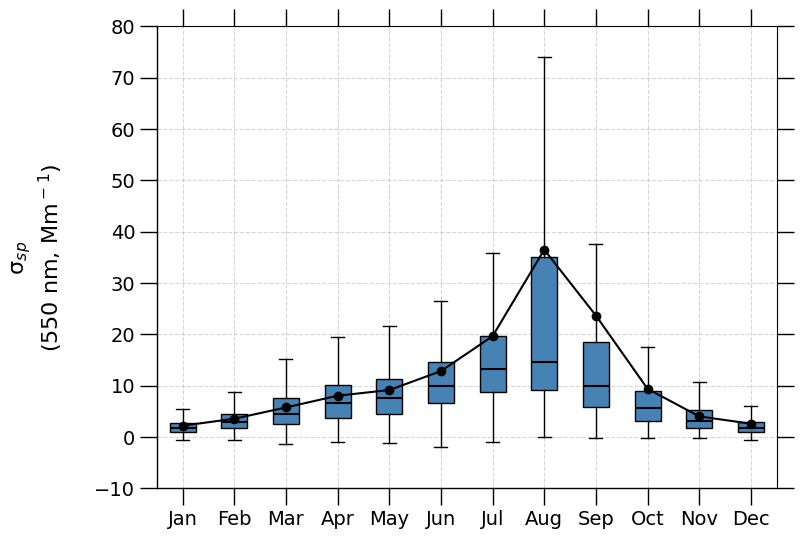

In [16]:
if aerosol_variable == 'scattering':
    new_variable_format = 'σ$_s$$_p$'
else:
    new_variable_format = 'σ$_a$$_p$'
    
if PM == 'pm1':
    new_PM_format = 'pm$_1$'
else:
    new_PM_format = 'pm$_1$$_0$'


columns = adjusted_coefficients(adjusted_csv_path)
df = get_550_dataframe(columns)
months = new_aerosol_plots(df)
coefficient_dataframe = monthly_plot(d, PM)

plt.figure(figsize=(8, 6))
ax = plt.gca()

box = plt.boxplot(
    [months[month].dropna() for month in months.columns],
    tick_labels=months.columns,  
    patch_artist=True,
    boxprops=dict(facecolor='steelblue'),
    # boxprops=dict(facecolor='darkorange'),
    showfliers=False,
    medianprops={'color':'black', 'linewidth':1.5},
)


mean_values = coefficient_dataframe[f'{PM}_{aerosol_variable}_coeff_550']
mean_line = plt.plot(
    np.arange(len(mean_values)) + 1,  
    mean_values,                      
    color='black',
    marker='o',
    label='Mean')[0]  

plt.ylabel(f"{new_variable_format}\n(550 nm, Mm$^-$$^1$)\n", fontsize=16)

# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

ax.tick_params(axis='x', which='both', top=True, labeltop=False) 
ax.tick_params(axis='y', which='both', right=True, labelright=False) 
ax.tick_params(axis='both', which='major', labelsize=14, width=1, length=12)
# ax.tick_params(axis='both', which='major', width=1, length=12)

plt.grid(axis='both', linestyle='--')
ax.grid(True, alpha=0.5) # Show grid, customize style and transparency

ax = plt.gca()
yticks = ax.get_yticks()           
yticks = [y for y in yticks if y != -1]  
ax.set_yticks(yticks)  

# months = months.rename(columns={'Jan': 'J', 'Feb': 'F', 'Mar':'M', 'Apr':'A', 'May':'M', 'Jun':'J', 'Jul':'J', 
#                             'Aug':'A', 'Sep':'S', 'Oct':'O', 'Nov':'N', 'Dec':'D'})
# ax = plt.gca()
# ax.set_xticklabels(months.columns)

plt.show()


In [17]:
site_name = input('input site name')
aerosol_variable = input('what variable are you looking for?')
PM = input('which cut size?')

site_path = ['SPL_2011_2024_final.csv', 'table_mountain_2019_2024_aerosol_data.csv']
site = None

if site_name == 'SPL':
    site = site_path[0]
    
else:
    site = site_path[1]
    
adjusted_csv_path = os.path.join(os.getcwd(), f'{site}')

columns = adjusted_coefficients(adjusted_csv_path)
plots = aerosol_plots(columns, aerosol_variable)
cleaned = cleaned_csv(plots)  
c = monthly_aerosol_df(cleaned)
d = monthly_averages(c, year=2011)
monthly_plot(d, PM)

/var/folders/qt/58dpzqx91zx8zdcphrmx5ynw0000gn/T/ipykernel_59258/2442554033.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ave_day = dataframe.groupby('time_int')[f'pm1_{aerosol_variable}_coeff_450', f'pm1_{aerosol_variable}_coeff_550', f'pm1_{aerosol_variable}_coeff_700',


,pm10_scattering_coeff_550
0,15.481149
1,11.442578
2,18.209698
3,13.800413
4,23.910238
5,17.508666
6,31.536241
7,50.684382
8,35.607265
9,27.248507


In [18]:
year = 2011
start_row = 0
# pm = input('select cut size')

def get_one_year(df, start_row):
    
    # Find the index of the first starttime for the next year after start_row
    end_row = -1
    prev_value = -1
    
    for index, value in enumerate(df['starttime'][start_row:]):
        if value < prev_value:
            end_row = start_row + index
            break
            
        prev_value = value
        
    if end_row < 0:
        end_row = start_row + len(df['starttime'][start_row:])
    # print('start_row: ' + str(start_row) + '; end_row: ' + str(end_row))
 
    return df[start_row:end_row] 

def monthly_averages(ave_day, year):
    monthly_avg = []
    
    for month in range(1, 13):
        
        month_name = calendar.month_name[month]
        days_in_month = calendar.monthrange(year, month)[1]
        
        month_data = ave_day.iloc[:days_in_month]
        
        month_avg = month_data[ave_day.columns[2:]].mean()
        
        month_avg_dict = month_avg.to_dict()
        month_avg_dict['month'] = month_name 
        
        monthly_avg.append(month_avg_dict)
        ave_day = ave_day.iloc[days_in_month:]

    monthly_avg_df = pd.DataFrame(monthly_avg)

    return monthly_avg_df

def get_550_dataframe(columns):
    
    variable_columns = []
    
    dataframe = columns[6]
    
    new_dictionary = {
        'coefficients': {
            'scattering': columns[3], 
            'absorption': columns[1]
            },
        'starttime':columns[0]
    }
    
    for variable in new_dictionary['coefficients']:    
        
        for coefficient in new_dictionary['coefficients'][variable]:
            if coefficient == f'{PM}_{aerosol_variable}_coeff_550':
                variable_columns.append(coefficient)
                
    for time in new_dictionary['starttime']:
        variable_columns.append(time)
        
    df = pd.DataFrame(dataframe[variable_columns]).dropna()
    
    return df

In [19]:
def get_monthly_data(df):
    result_array = {
        "Jan": [],
        "Feb": [],
        "Mar": [],
        "Apr": [],
        "May": [],
        "Jun": [],
        "Jul": [],
        "Aug": [],
        "Sep": [],
        "Oct": [],
        "Nov": [],
        "Dec": []
    } 
    
    year = 2011
    start_row = 0
    while start_row < len(df['time_int']):
        new_df = pd.DataFrame(get_one_year(df, start_row))
                
        if new_df.empty:
            start_row = len(df['time_int'])
            
        else:
            
            first_day = 1   
            start_index = 0
        
            month = 1
            while start_index < len(new_df['time_int']):
                
                month_name = calendar.month_name[month][:3]

                days_in_month = calendar.monthrange(year, month)[1]

                last_day = first_day + days_in_month - 1
                end_index = -1
                
                for index, value in enumerate(new_df['time_int'][start_index:]):
                    if value > last_day:
                        end_index = index + start_index
                        first_day = value
                        break
                    
                    else:
                        result_array[month_name].append(new_df[f'{PM}_{aerosol_variable}_coeff_550'].values[index + start_index])
                                        
                if end_index < 0:
                    end_index = len(new_df['time_int'])
                    
                start_index =  end_index         
                # for value in month_data["pm10_scattering_coeff_550"]:
                #     result_array[month_name].append(value)       
                month += 1
                                    
        year += 1            
        start_row = start_row + len(new_df['time_int'])
        # print("new start_row " + str(start_row))
             
    # max_month = max(result_array, key = lambda x: len(set(result_array[x])))  
    # max_len = len(result_array[max_month])

    max_len = max([len(n) for n in result_array.values()])
    
    for month in result_array.keys():
        # print(month + ": " + str(len(result_array[month])))
        if len(result_array[month]) < max_len:
            result_array[month].extend([None] * (max_len - len(result_array[month])))
    
    return pd.DataFrame(result_array)

# def aerosol_plots(df):
def new_aerosol_plots(df):

    df['time_int'] = np.floor(df['starttime']).astype(int)

    months = get_monthly_data(df)
    return months

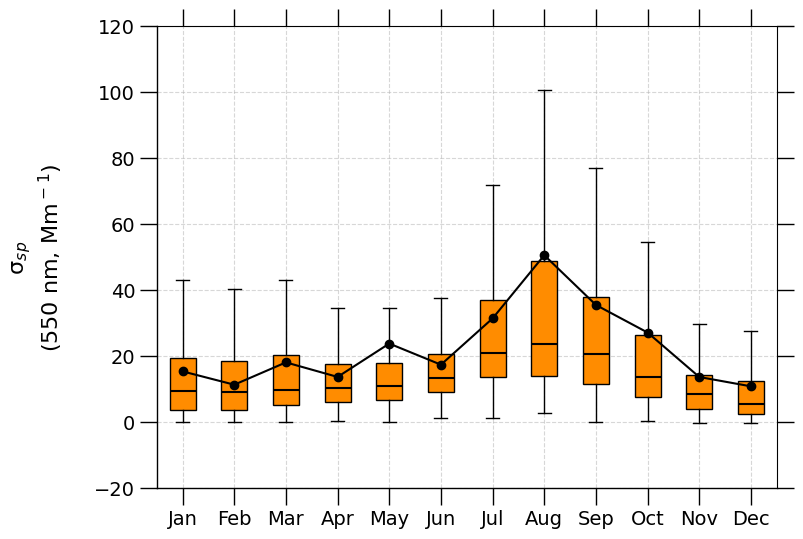

In [20]:
if aerosol_variable == 'scattering':
    new_variable_format = 'σ$_s$$_p$'
else:
    new_variable_format = 'σ$_a$$_p$'
    
if PM == 'pm1':
    new_PM_format = 'pm$_1$'
else:
    new_PM_format = 'pm$_1$$_0$'


columns = adjusted_coefficients(adjusted_csv_path)
df = get_550_dataframe(columns)
new_months = new_aerosol_plots(df)
new_coefficient_dataframe = monthly_plot(d, PM)


plt.figure(figsize=(8, 6))
ax = plt.gca()

merged_box = plt.boxplot(
    [new_months[month].dropna() for month in new_months.columns],
    tick_labels=new_months.columns,  
    patch_artist=True,
    # boxprops=dict(facecolor='steelblue'),
    boxprops=dict(facecolor='darkorange'),
    showfliers=False,
    medianprops={'color':'black', 'linewidth':1.5},
)

merged_mean_values = new_coefficient_dataframe[f'{PM}_{aerosol_variable}_coeff_550']
mean_line = plt.plot(
    np.arange(len(merged_mean_values)) + 1,  
    merged_mean_values,                      
    color='black',
    marker='o',
    label='Mean')[0]  

plt.ylabel(f"{new_variable_format}\n(550 nm, Mm$^-$$^1$)\n", fontsize=16)

# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
# Create new top and right spines
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

ax.tick_params(axis='x', which='both', top=True, labeltop=False) 
ax.tick_params(axis='y', which='both', right=True, labelright=False) 
ax.tick_params(axis='both', which='major', labelsize=14, width=1, length=12)

plt.grid(axis='both', linestyle='--')
ax.grid(True, alpha=0.5)

ax = plt.gca()
yticks = ax.get_yticks()          
yticks = [y for y in yticks if y != -1]  
ax.set_yticks(yticks)              

# new_months = new_months.rename(columns={'Jan': 'J', 'Feb': 'F', 'Mar':'M', 'Apr':'A', 'May':'M', 'Jun':'J', 'Jul':'J', 
#                             'Aug':'A', 'Sep':'S', 'Oct':'O', 'Nov':'N', 'Dec':'D'})
# ax = plt.gca()
# ax.set_xticklabels(new_months.columns)

plt.show()


In [21]:
months 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.54,7.79,2.71,6.18,5.01,21.14,18.64,160.20,7.63,9.79,4.13,2.11
1,1.67,8.52,2.69,7.22,4.25,20.95,16.12,159.38,7.74,13.86,3.16,2.58
2,1.54,4.32,2.83,7.02,3.67,21.22,15.25,202.10,7.85,15.19,3.15,2.12
3,1.82,6.77,2.46,7.95,3.77,20.80,19.61,166.48,7.90,15.95,3.61,1.85
4,1.80,9.83,3.28,8.42,3.90,18.30,16.02,73.60,7.82,18.67,3.53,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...
10060,NaN,NaN,NaN,NaN,6.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10061,NaN,NaN,NaN,NaN,5.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10062,NaN,NaN,NaN,NaN,4.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10063,NaN,NaN,NaN,NaN,5.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
new_months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.81,32.76,17.40,49.15,1.48,7.89,7.02,18.97,33.59,42.68,13.21,2.26
1,12.40,33.65,15.72,59.67,1.02,7.48,6.55,18.59,29.36,44.92,12.38,4.23
2,16.55,34.76,14.00,62.73,0.91,8.68,10.08,16.94,37.65,40.64,13.14,3.56
3,25.53,34.03,13.55,61.25,1.43,9.07,16.51,18.00,43.50,40.88,14.03,5.08
4,19.99,35.35,12.24,63.29,1.45,9.17,14.24,14.60,54.01,30.36,14.39,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...
4305,NaN,NaN,36.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4306,NaN,NaN,38.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4307,NaN,NaN,43.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4308,NaN,NaN,46.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


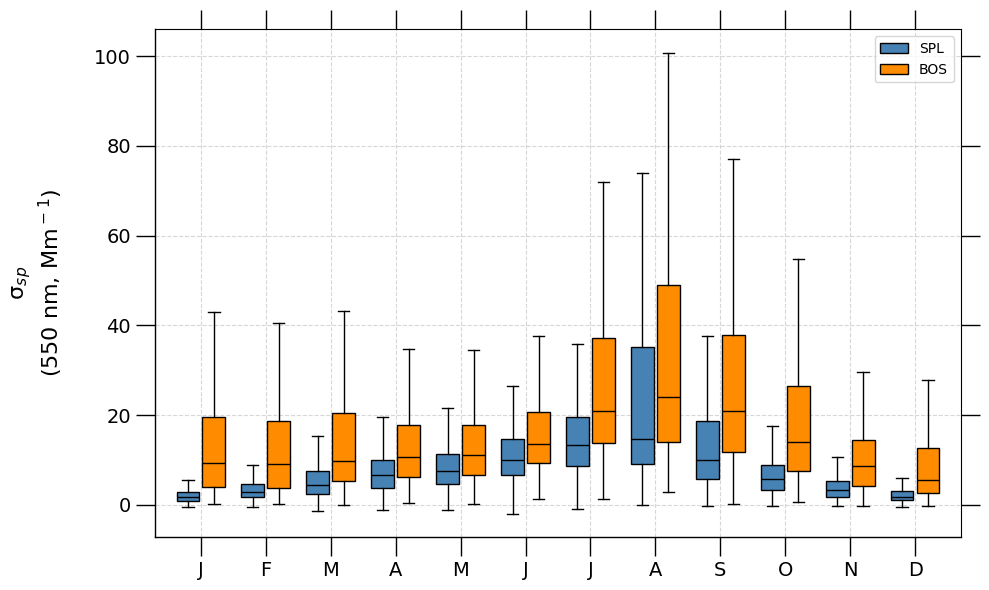

In [23]:
if aerosol_variable == 'scattering':
    new_variable_format = 'σ$_s$$_p$'
else:
    new_variable_format = 'σ$_a$$_p$'
    
if PM == 'pm1':
    new_PM_format = 'pm$_1$'
else:
    new_PM_format = 'pm$_1$$_0$'

box_months = months.columns
box_len = len(box_months)

positions1 = np.arange(1, box_len + 1) - 0.2
positions2 = np.arange(1, box_len + 1) + 0.2

fig, ax = plt.subplots(figsize=(10, 6))
SPL = ax.boxplot([months[col].dropna() for col in months.columns], positions=positions1, widths=0.35,
                  patch_artist=True, boxprops=dict(facecolor='steelblue'), medianprops=dict(color='black'), showfliers=False)
BOS = ax.boxplot([new_months[col].dropna() for col in new_months.columns], positions=positions2, widths=0.35,
                  patch_artist=True, boxprops=dict(facecolor='darkorange'), medianprops=dict(color='black'), showfliers=False)

mid_positions = (positions1 + positions2) / 2
plt.ylabel(f"{new_variable_format}\n(550 nm, Mm$^-$$^1$)\n", fontsize=16)
final_boxplot = ax.legend([SPL["boxes"][0], BOS["boxes"][0]], ["SPL", "BOS"])
ax.set_xticks(mid_positions)
ax.set_xticklabels(box_months)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

ax.tick_params(axis='x', which='both', top=True, labeltop=False) 
ax.tick_params(axis='y', which='both', right=True, labelright=False)
ax.tick_params(axis='both', which='major', labelsize=14, width=1, length=14)
plt.grid(True, linestyle='--', alpha=0.5)
ax = plt.gca()
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
plt.tight_layout()
plt.show()